# <font color = blue> Salary Predictions Based on Job Descriptions </font>

# Part 1 - DEFINE

## ---- 1 Define the problem ----

The main object of this assignment is to examine a set of job postings with salaries and then predict salaries for a new set of job postings. The model will decide the remunerations for present as well as future employees of any organization.

With the help of Machine Learning, salaries will be forecasted depending upon years of experience, job type, college degree, college major, industry, and miles from a metropolis.

The raw data comprises training and test dataset in which training set has aforementioned attribues with the corresponding salaries while test dataset does not have salary information and would act as a real-world dataset.

The features of the datasets:

> - **Years Experience:** How many years of experience any person has.<br>
> - **Job Type:** The position held (CEO, CFO, CTO, Vice President, Manager, Senior, Junior, Janitor).<br>
> - **Degree:** Doctoral, Masters, Bachelors, High School, or None.<br>
> - **Major:** Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None.<br>
> - **Industry:** Auto, Education, Finance, Health, Oil, Service, or Web.<br>
> - **Miles From Metropolis:** How many miles of commuting.<br>

In [1]:
'''This script loads, explores, and visualizes the datasets of salary prediction'''

__author__ = "Maulik Vyas"
__email__ = "vyasm433@gmail.com"

# Part 2 - DISCOVER

##  ---- 2 Load the data ----

In [2]:
#import your libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("default")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

C:\Users\mauli\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
#load the raw data into a Pandas dataframe
train_feat = pd.read_csv(r"C:\\Users\\mauli\\OneDrive\\Documents\\GitHub\\salarypredictionportfolio\\data\\train_features.csv")
train_sal = pd.read_csv(r"C:\\Users\\mauli\\OneDrive\\Documents\\GitHub\\salarypredictionportfolio\\data\\train_salaries.csv")
test_feat = pd.read_csv(r"C:\\Users\\mauli\\OneDrive\\Documents\\GitHub\\salarypredictionportfolio\\data\\test_features.csv")

### Examine the data

In [4]:
train_feat.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_sal.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
test_feat.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### Use .info() to check the length and datatypes

In [7]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
test_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


## ---- 3 Clean the data ----

### Check for any duplicates

In [10]:
train_feat.duplicated().sum()

0

In [11]:
train_sal.duplicated().sum()

0

In [12]:
test_feat.duplicated().sum()

0

### Identify numerical and categorical features

In [13]:
train_feat.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [14]:
numeric_cols = ["yearsExperience", "milesFromMetropolis"]

In [15]:
categoric_cols = ["jobId", "companyId", "jobType", "degree", "major", "industry"]

### Summarize numeric and categorical variables

In [16]:
train_feat.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [17]:
train_feat.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684573040,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merge attributes and outcome in one dataframe

In [18]:
#Merge the features and salaries on jobId
train_data = pd.merge(train_feat, train_sal, on ='jobId')
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Delete original dataframe

In [19]:
#Delete original file to save memory
del train_feat
del train_sal

In [20]:
#Check length and datatypes of new dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### Check for missing data

In [21]:
missing_data = train_data.isnull().sum()
missing_data

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [22]:
#Convert the object into categorical data

train_data["jobId"]=pd.Categorical(train_data["jobId"])
train_data["companyId"]=pd.Categorical(train_data["companyId"])
train_data["jobType"]=pd.Categorical(train_data["jobType"])
train_data["degree"]=pd.Categorical(train_data["degree"])
train_data["major"]=pd.Categorical(train_data["major"])
train_data["industry"]=pd.Categorical(train_data["industry"])
train_data.dtypes

jobId                  category
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

## ---- 4 Explore the data (EDA) ----

## Summarize the features and target variables

In [23]:
#Descriptive statistics of train data
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [24]:
#Unique value in the data
train_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [25]:
stats = train_data.salary.describe()
print(stats)
IQR = stats["75%"] - stats["25%"]
upper = stats["75%"] + 1.5 * IQR
lower = stats["25%"] - 1.5 * IQR
print("The upper and lower bounds for suspected outliers are {} and {}".format(upper,lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5


## Examine potential outliers

In [26]:
#Check potential outliers below lower bounds
train_data[train_data.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


From these entries, it could be believed that these positions are not volunteery and the salary data is missing or corrupt, so we should remove this data from our dataframe.

In [27]:
#Check potential outliers above upper bounds
train_data.loc[train_data.salary > 222.5, "jobType"].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
JANITOR              0
Name: jobType, dtype: int64

In [28]:
#Check potential outliers above upper bounds
train_data[(train_data.salary > 222.5) & (train_data.jobType == "JUNIOR")]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


Even though the job type and salaries do not match together, the degree, major and the amount of experience clearly justify the salary, so we should keep them in our dataframe and do not remvoe them.

In [29]:
#Remove the missing data
train_data = train_data[train_data.salary > 8.5]

### Look for correlation

In [30]:
#Find the correlation matrix
train_data.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [31]:
train_data.skew()

yearsExperience        0.001671
milesFromMetropolis   -0.001144
salary                 0.346527
dtype: float64

In [32]:
train_data.kurt()

yearsExperience       -1.205126
milesFromMetropolis   -1.199018
salary                -0.025751
dtype: float64

### Visualize target variable (salary)

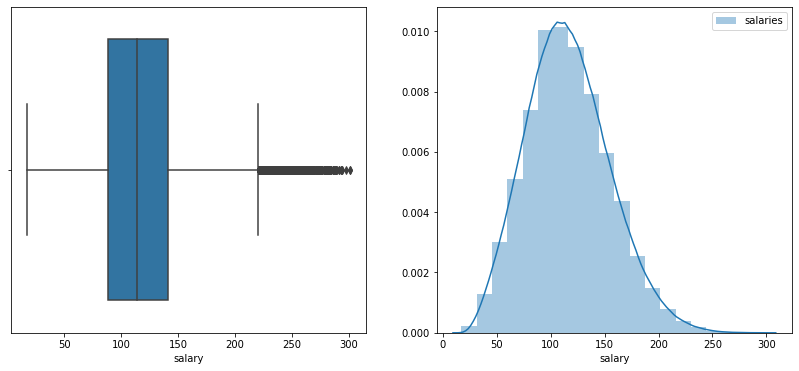

In [33]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_data.salary)
plt.subplot(1,2,2)
sns.distplot(train_data.salary, bins=20, label="salaries")
plt.legend()
plt.show()

In [34]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

Populating the interactive namespace from numpy and matplotlib


In [35]:
def plot_attribute(train_data, col):
    '''
    Make plot for every attribute
    left plot, the distribution of samples on the attribute
    right plot, the dependance of salary on the attribute
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if train_data[col].dtype == 'int64':
        train_data[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary in each category
        mean = train_data.groupby(col)['salary'].mean()
        train_data[col] = train_data[col].astype('category')
        levels = mean.sort_values().index.tolist()
        train_data[col].cat.reorder_categories(levels, inplace=True)
        train_data[col].value_counts().plot()
    
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if train_data[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = train_data.groupby(col)['salary'].mean()
        std = train_data.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.2)
    else:
        sns.boxplot(x = col, y = 'salary', data=train_data)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

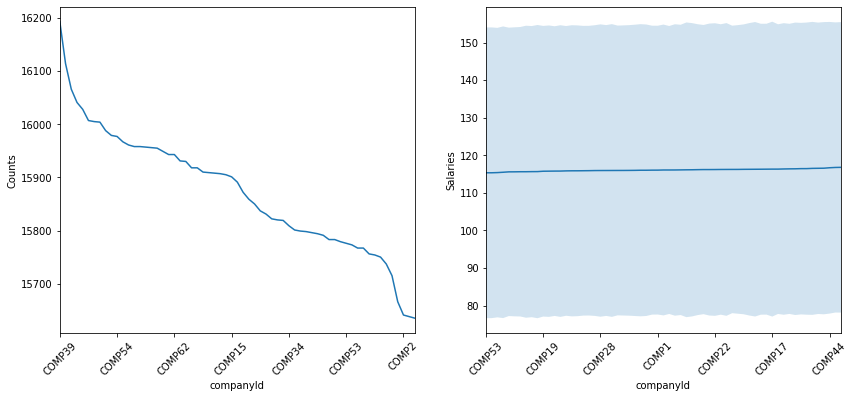

In [36]:
plot_attribute(train_data, 'companyId')

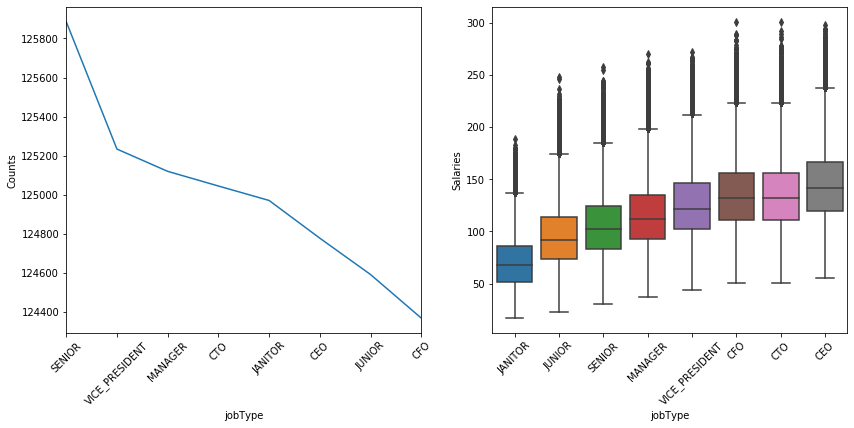

In [37]:
plot_attribute(train_data, 'jobType')

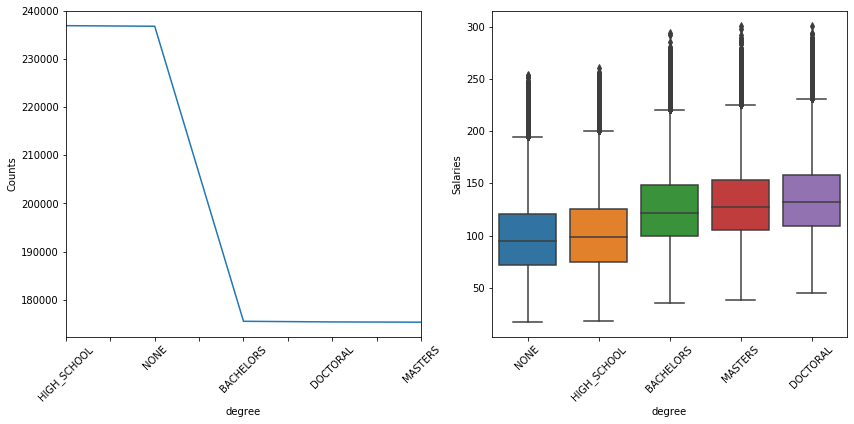

In [38]:
plot_attribute(train_data, 'degree')

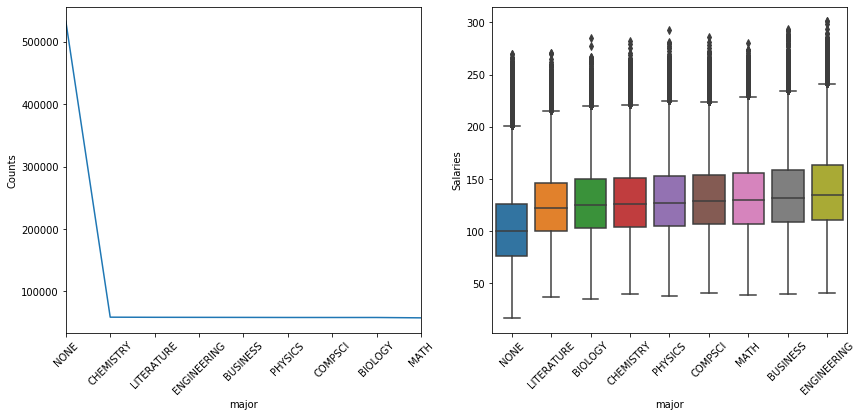

In [39]:
plot_attribute(train_data, 'major')

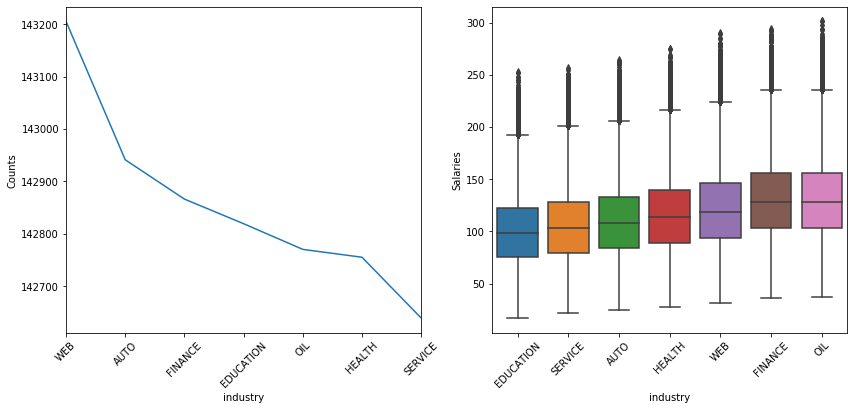

In [40]:
plot_attribute(train_data, 'industry')

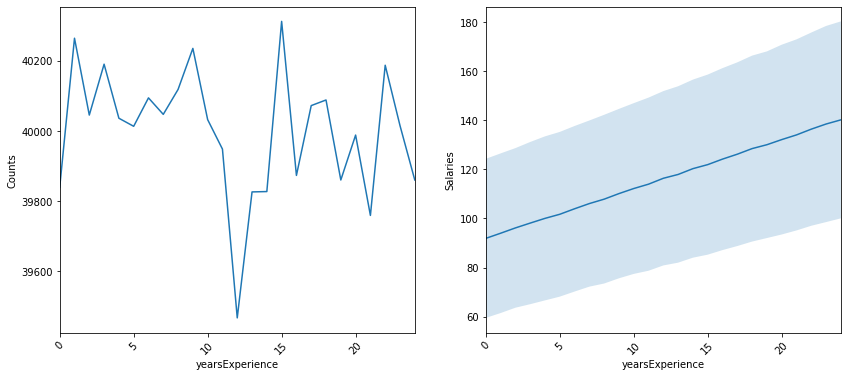

In [41]:
plot_attribute(train_data, 'yearsExperience')

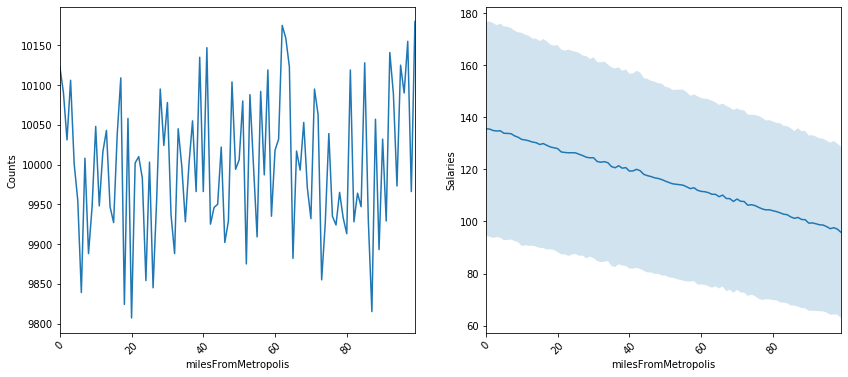

In [42]:
plot_attribute(train_data, 'milesFromMetropolis')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text xticklabel objects>)

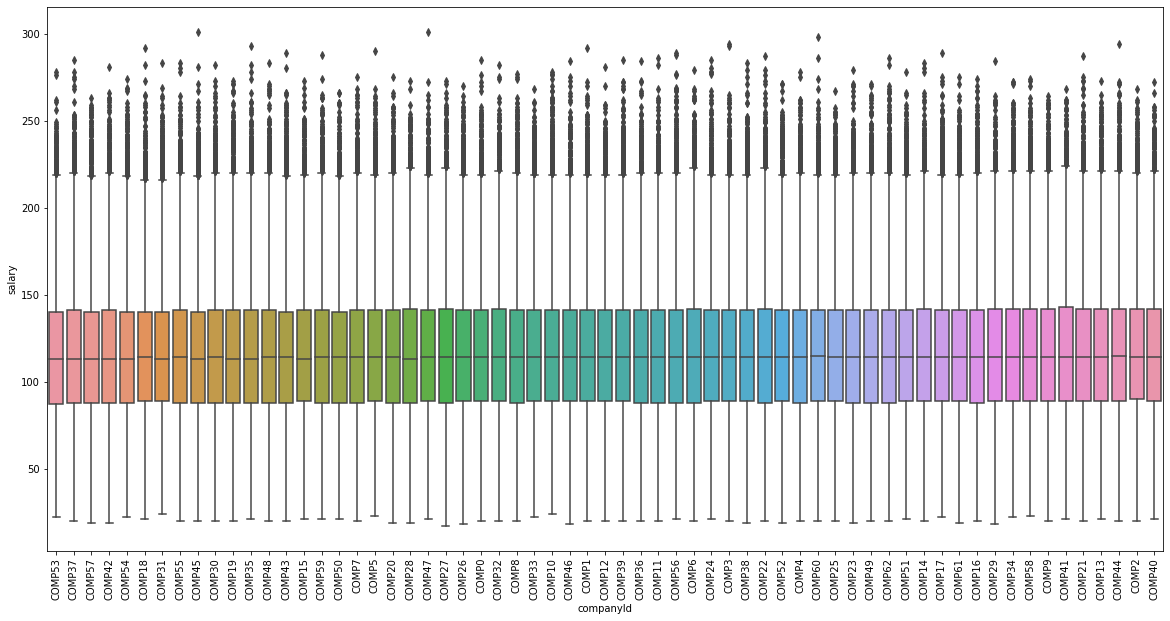

In [43]:
width = 20
height = 10
data = pd.concat([train_data['salary'], train_data['companyId']], axis=1)
f, ax = plt.subplots(figsize = (width, height))
fig = sns.boxplot(x='companyId', y='salary', data=data)
plt.xticks(rotation=90)

In [44]:
#Remove jobId and companyId
train_data.drop('jobId', axis=1, inplace=True)
train_data.drop('companyId', axis=1, inplace=True)

train_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [45]:
#One hot encoding categorical data in train set
train_data = pd.get_dummies(train_data)
train_data.head()

,yearsExperience,milesFromMetropolis,salary,jobType_JANITOR,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,...,major_MATH,major_BUSINESS,major_ENGINEERING,industry_EDUCATION,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,10,83,130,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,38,137,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8,17,142,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,16,163,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\mauli\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


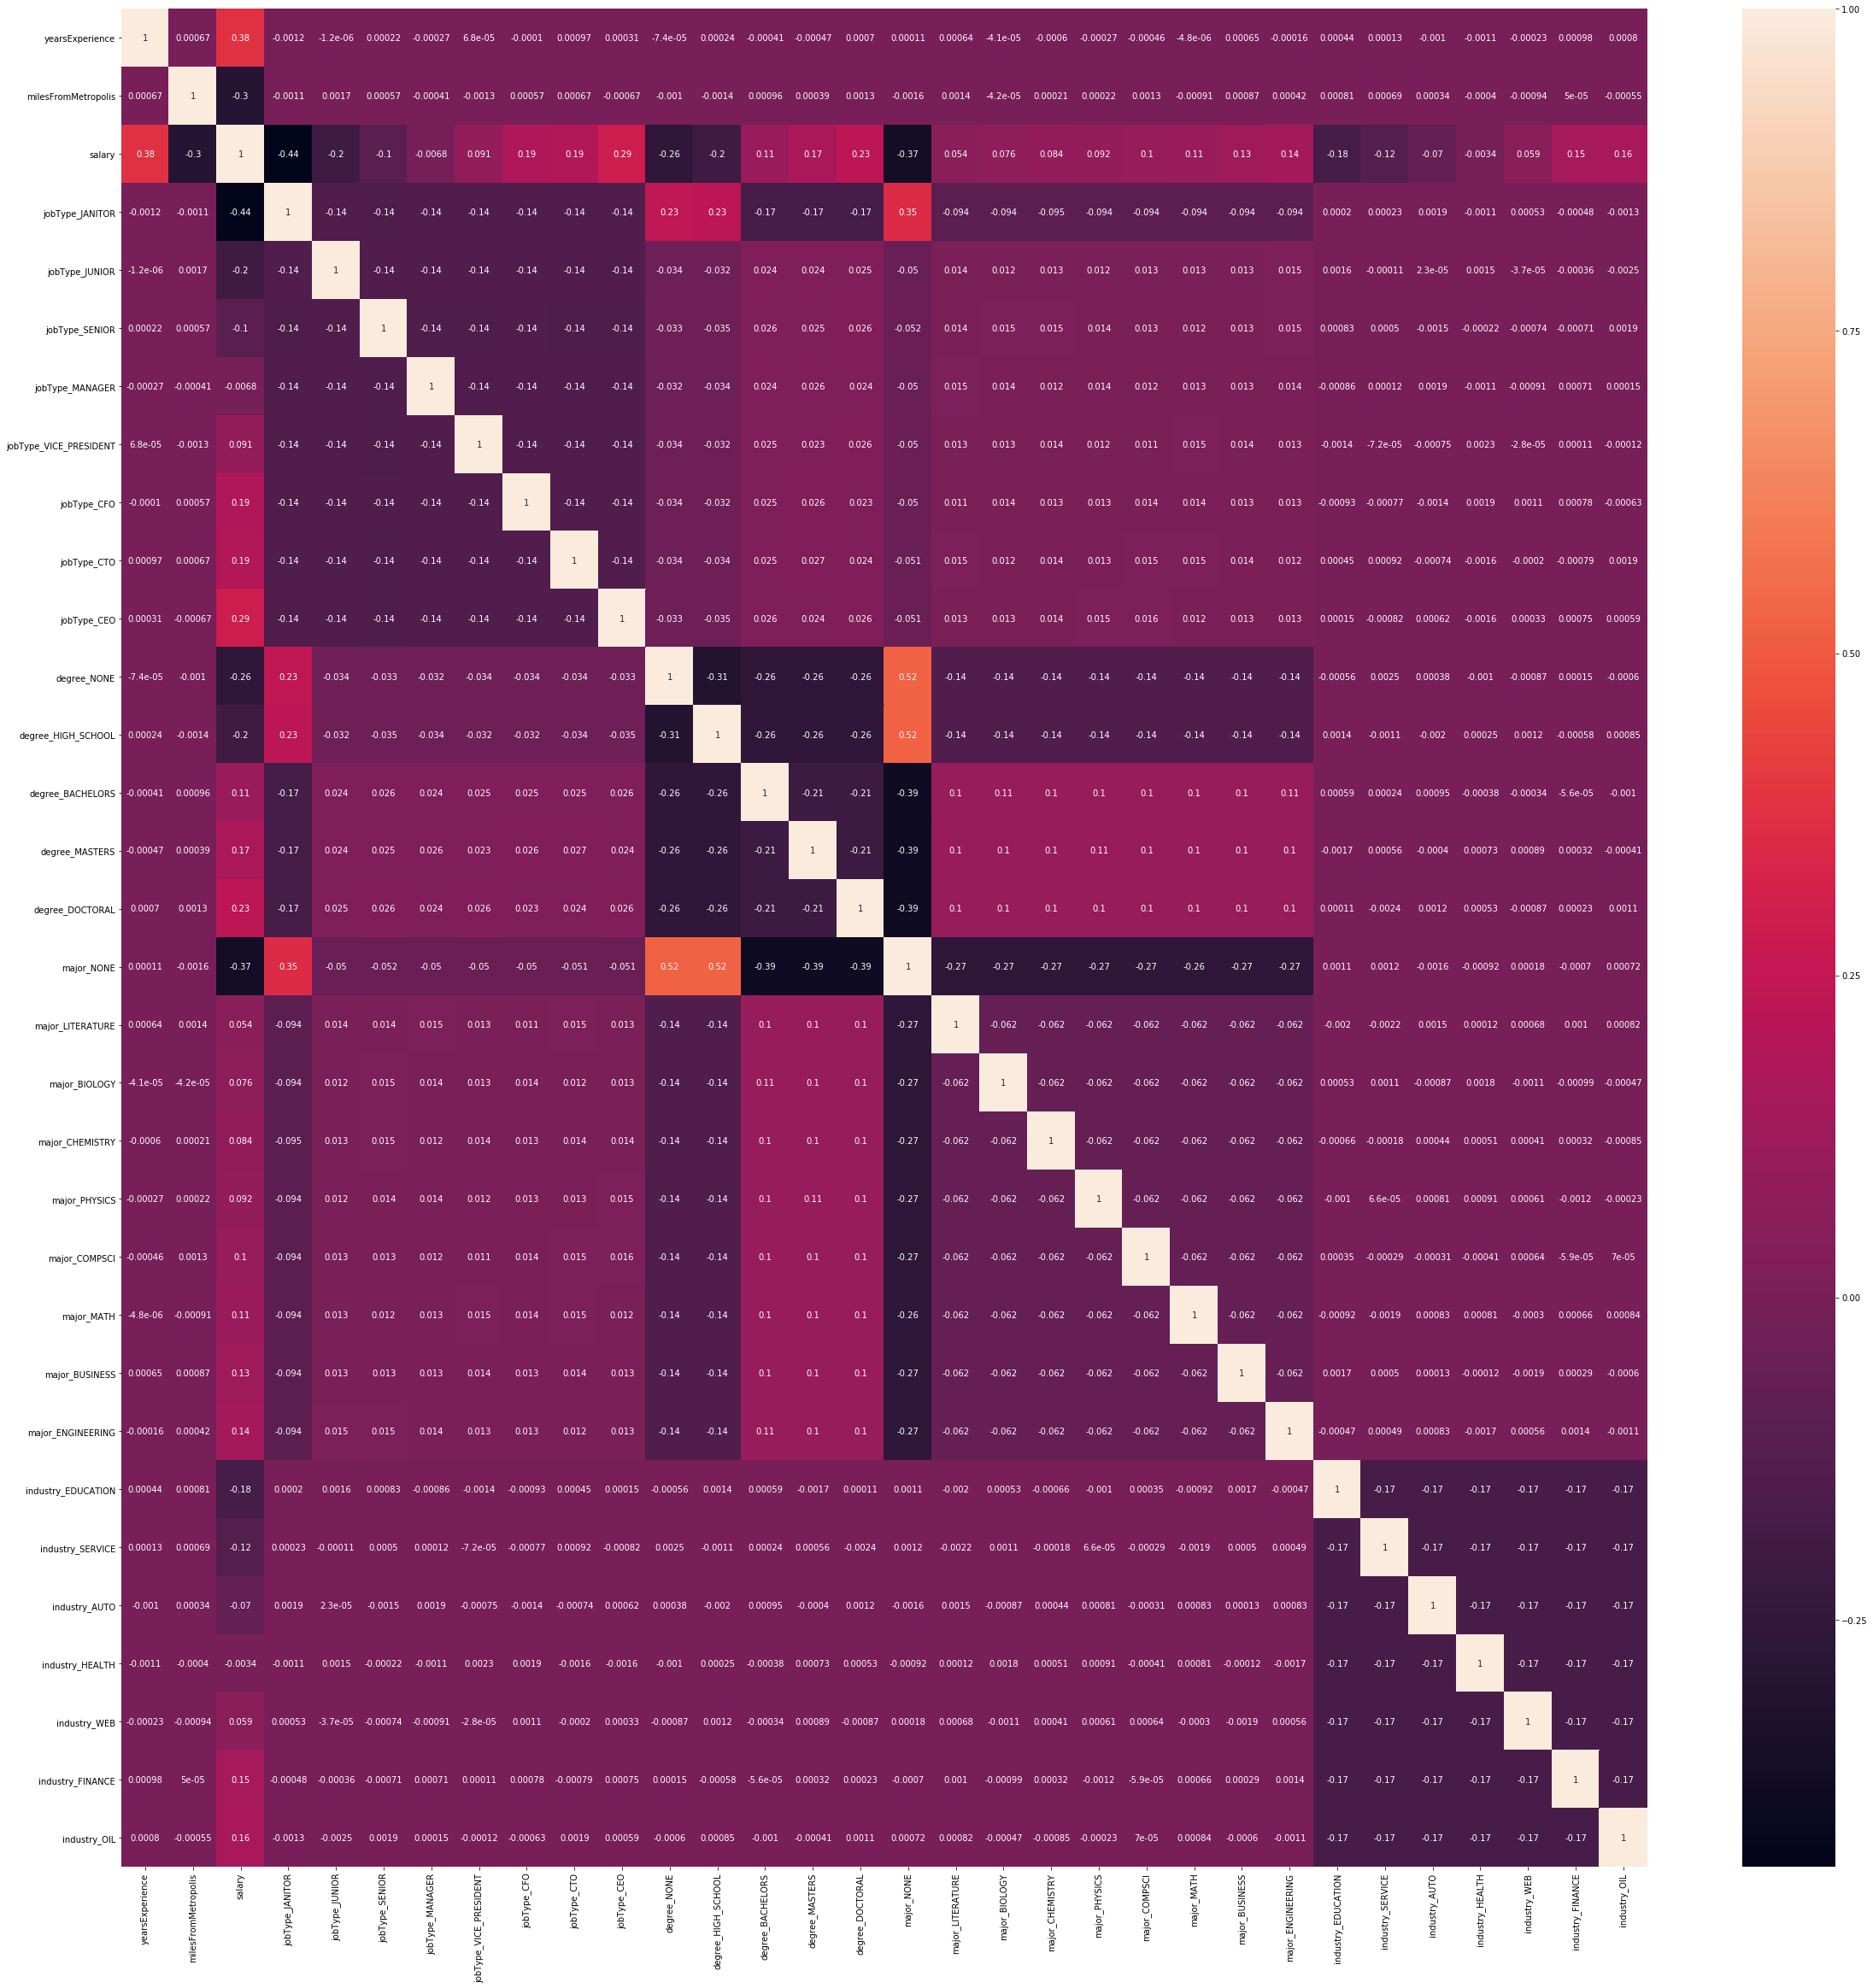

In [46]:
#Plot heatmap of all data with correlation coefficients visible
train_data_corr = train_data.corr()
plt.subplots(figsize=(40,40))
sns.heatmap(train_data_corr, cbar=True, annot=True, fmt=".2g")
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.show()

In [47]:
#Split data into train and test data set
X = train_data[train_data.loc[ : , train_data.columns != 'salary'].columns]
y = train_data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
X_train.head()
y_train.head()

583584     90
465089    164
686217     87
176613    126
249786    133
Name: salary, dtype: int64

In [49]:
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
         yearsExperience  milesFromMetropolis  jobType_JANITOR  jobType_JUNIOR  \
583584               17                   75                0               0   
465089               14                   88                0               0   
686217               12                   65                0               1   
176613                8                   68                0               0   
249786                3                   13                0               0   

        jobType_SENIOR  jobType_MANAGER  jobType_VICE_PRESIDENT  jobType_CFO  \
583584               0                0                       1            0   
465089               0                0                       0            0   
686217               0                0                       0            0   
176613               1                0                       0            0   
249786               0                0                       1            0   

        jobType_CTO  j

In [50]:
#Create linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(lm.intercept_)
print(lm.coef_)

54205785293.2069
[ 2.01084636e+00 -3.99647595e-01 -3.73538662e+10 -3.73538661e+10
 -3.73538661e+10 -3.73538661e+10 -3.73538661e+10 -3.73538661e+10
 -3.73538661e+10 -3.73538661e+10 -8.10600215e+09 -8.10600214e+09
 -8.10600214e+09 -8.10600213e+09 -8.10600213e+09 -1.62536367e+09
 -1.62536367e+09 -1.62536367e+09 -1.62536367e+09 -1.62536366e+09
 -1.62536366e+09 -1.62536366e+09 -1.62536366e+09 -1.62536366e+09
 -7.12055327e+09 -7.12055326e+09 -7.12055326e+09 -7.12055325e+09
 -7.12055325e+09 -7.12055324e+09 -7.12055324e+09]


In [52]:
yhat = lm.predict(X_train)
print("The output of the first five predicted values are: ", yhat[0:5])

The output of the first five predicted values are:  [126.75416565 144.07197571  93.90700531 113.80144501 133.27671814]


In [53]:
#Print MSE of training data
print("The mean squared error of ourr prediction model is:", mean_squared_error(y_train,yhat))

The mean squared error of ourr prediction model is: 384.26948301144864


In [54]:
#Print accuracy score using 5-fold cross validation
scores = cross_val_score(lm, X_train, y_train, cv=2)
print("5-Fold Cross Validation Accuracy (train_data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (train_data): 0.7433113187468426 1.7554190956392546e-07


In [55]:
#Linear regression in variable
yhat_test = lm.predict(X_test)
yhat_test[:5]

array([157.7997818 ,  62.36647797, 108.70929718, 112.59149933,
        92.51925659])

In [56]:
# Print MSE of testing data
print("The mean squared error of our test set predicitons is:", mean_squared_error(y_test, yhat_test))

The mean squared error of our test set predicitons is: 384.82986860214265


In [57]:
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(lm, X_test, y_test, cv=2, n_jobs = 2)
print("5-Fold Cross Validation Accuracy (test data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (test data): 0.744352523677869 0.0020232631833393966


Distribution, accuracy score, and MSE are not incredibly different when comparing the training and testing data. We will see if MSE can be improved by reducing it to less than 360.

In [58]:
#Fit and transform the variables using 2nd order polynomial
pr = PolynomialFeatures(2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [59]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
yhat_prTrain = poly.predict(X_train_pr)
yhat_prTrain[0:5]

array([122.80250174, 154.5903607 ,  93.92851263, 108.46853262,
       124.50215966])

In [61]:
print("Predicted Values:", yhat_prTrain[0:5])
print("True Values:", y_test[0:5].values)

Predicted Values: [122.80250174 154.5903607   93.92851263 108.46853262 124.50215966]
True Values: [186  67  82 104 106]


In [62]:
yhat_prTest = poly.predict(X_test_pr)
yhat_prTest[0:5]

array([159.44958502,  60.10609442,  96.83101088,  99.6200543 ,
        93.33356863])

In [63]:
print("Predicted Values:", yhat_prTest[0:5])
print("True Values:", y_test[0:5].values)

Predicted Values: [159.44958502  60.10609442  96.83101088  99.6200543   93.33356863]
True Values: [186  67  82 104 106]


In [64]:
print("R-Squared of training data:", poly.score(X_train_pr,y_train))
print("R-Squared of testing data:", poly.score(X_test_pr,y_test))

R-Squared of training data: 0.7638921854866405
R-Squared of testing data: 0.7645107318094739


In [65]:
print("MSE of training data:", mean_squared_error(y_train,yhat_prTrain))
print("MSE of testing data:", mean_squared_error(y_test,yhat_prTest))

MSE of training data: 353.5146968802364
MSE of testing data: 354.65450393159267


### Gradient Boosting Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=0)
gbm.fit(X_train, y_train)
gbm

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
yhat_gbm = gbm.predict(X_train)
print("The output of the first five predicted values are: ", yhat_gbm[0:5])

The output of the first five predicted values are:  [122.59729809 155.01364     95.6064968  109.9001815  125.02747665]


In [91]:
#Print MSE of training data
print("The mean squared error of the prediction model is:", mean_squared_error(y_train,yhat_gbm))

The mean squared error of the prediction model is: 354.5440336217963


In [92]:
#Print accuracy score using 5-fold cross validation
scores = cross_val_score(gbm, X_train, y_train, cv=2)
print("5-Fold Cross Validation Accuracy (train_data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (train_data): 0.7614107257552194 1.763001435728384e-06


In [93]:
#Linear regression in variable
yhat_test_gbm = gbm.predict(X_test)
yhat_test_gbm[:5]

array([155.91292688,  62.20491499,  96.88228414, 101.17543451,
        97.2718429 ])

In [94]:
# Print MSE of testing data
print("The mean squared error of our test set predicitons is:", mean_squared_error(y_test, yhat_test_gbm))

The mean squared error of our test set predicitons is: 357.65590496546145


In [95]:
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(gbm, X_test, y_test, cv=2, n_jobs = 2)
print("5-Fold Cross Validation Accuracy (test data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (test data): 0.7603129852897192 0.001620018174667892


# Ridge Regression

In [123]:
RidgeModel = Ridge(alpha=0.0001)

In [97]:
RidgeModel.fit(X_train_pr,y_train)

C:\Users\mauli\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.23918e-18): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
yhat_ridge_train = RidgeModel.predict(X_train_pr)
yhat_ridge_test = RidgeModel.predict(X_test_pr)

In [99]:
print('Predicted:', yhat_ridge_train[0:4])
print('Actual :', y_train[0:4].values)

Predicted: [122.80519304 154.601786    93.93271715 108.47095231]
Actual : [ 90 164  87 126]


In [100]:
print('Predicted:', yhat_ridge_test[0:4])
print('Actual :', y_test[0:4].values)

Predicted: [159.45554396  60.1115973   96.81862943  99.59683356]
Actual : [186  67  82 104]


In [101]:
print("R Squared of training data:", RidgeModel.score(X_train_pr, y_train))
print("R Squared of testing data:", RidgeModel.score(X_test_pr, y_test))

R Squared of training data: 0.7638922264219945
R Squared of testing data: 0.7645107916745375


In [102]:
print("MSE of training data:", mean_squared_error(yhat_ridge_train, y_train))
print("MSE of testing data:", mean_squared_error(yhat_ridge_test, y_test))

MSE of training data: 353.5146355893838
MSE of testing data: 354.65441377285794


# Automate and Deploy Model

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [150]:
# Create pipeline for polynomial regression
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', Ridge())]
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [ ]:
RRModel =  pipe.fit(X, y)

In [ ]:
ypipe = pipe.predict(X)
ypipe[0:5]

### Now model can be saved to use anytime

In [140]:
from sklearn.externals import joblib

In [141]:
filename = 'final_salary_model.csv'
joblib.dump(RRModel, filename)

['final_salary_model.csv']

In [142]:
# Load model
loaded_model = joblib.load(filename)

In [143]:
# See result of test data with known salaries
result = loaded_model.score(X_test, y_test)
print(result)

0.744482159675928


# Prepare test data

In [145]:
# Load new data into dataframe
test_feat = pd.DataFrame(test_feat)

# Convert features to same types used in model
test_feat['jobId']=pd.Categorical(test_feat['jobId'])
test_feat['companyId']=pd.Categorical(test_feat['companyId'])
test_feat['jobType']=pd.Categorical(test_feat['jobType'])
test_feat['degree']=pd.Categorical(test_feat['degree'])
test_feat['major']=pd.Categorical(test_feat['major'])
test_feat['industry']=pd.Categorical(test_feat['industry'])

# Drop features not relevant to salary prediction
test_feat.drop('jobId', axis=1, inplace=True)
test_feat.drop('companyId', axis=1, inplace=True)

# One-hot encode categorical data
test_feat = pd.get_dummies(test_feat)

# View top 5 rows of data
test_feat.head(5)

KeyError: 'jobId'

In [136]:
# Predict salaries from new data
loaded_model.predict(test_feat)

array([154.06653535, 144.0872935 , 131.94696178, ..., 100.49711006,
       109.591492  , 164.54086945])